In [23]:
pip install ../../

Processing /home/mehdi/Straph
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for straph: filename=straph-0.3-py3-none-any.whl size=123605 sha256=d217f05bd3c3c4a472dd18a40abe1d6fce7e999e5f32a3391a3cd5f1f3a041d5
  Stored in directory: /tmp/pip-ephem-wheel-cache-fc2rwknx/wheels/a5/b6/52/18c617da8ab7981501f28a49d398fa4ccca532d1baece44b1e
Successfully built straph
  Attempting uninstall: straph
    Found existing installation: straph 0.3
    Uninstalling straph-0.3:
      Successfully uninstalled straph-0.3
You should consider upgrading via the '/home/mehdi/sage/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may 

In [1]:
import straph as sg
import pandas as pd
import matplotlib.pyplot as plt
import straph.betweenness as bt
import numpy

In [2]:
plt.rcParams["figure.figsize"] = (12,9)

In [19]:
T = [0, 100]
nb_node = 14
occurrence_law_node = 'poisson'
presence_law_node = 'uniform'

occurrence_param_node = 3
presence_param_node = 25

occurrence_law_link = 'poisson'
presence_law_link = 'uniform'

occurrence_param_link = 5
presence_param_link = 15

p_link = numpy.sqrt(nb_node)/nb_node

In [20]:
S = sg.erdos_renyi(T,
                    nb_node,
                    occurrence_law_node,
                    occurrence_param_node,
                    presence_law_node,
                    presence_param_node,
                    occurrence_law_link,
                    occurrence_param_link,
                    presence_law_link,
                    presence_param_link,
                    p_link)
S.describe()

Nb of Nodes :  14
Nb of segmented nodes :  26.0
Nb of links :  31
Nb of segmented links :  59.0
Nb of event times :  120


<AxesSubplot:xlabel='t', ylabel='Nodes'>

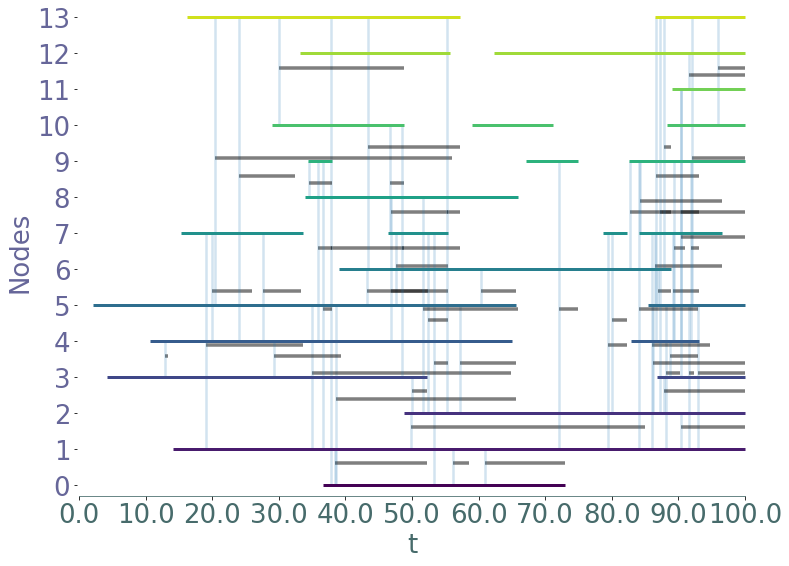

In [21]:
S.plot()

In [22]:
bt.to_undirected(S)

In [23]:
SS = S.stream_graph_to_link_stream()

In [24]:
SS.write_to_matthieu_link_stream("any")

In [35]:
#betweenness, general_contri, nouveau, events, sigma_r, latency, prev_next , contri, before, after, deltasvvt, no_succ ,features = bt.betweenness_all(SS)

In [36]:
#bt.simulations(SS, "papier")

In [27]:
bet_moi = bt.read_dictionary("papier_betweenness.pic")

In [28]:
import os
cmd = 'mv any_mat.ls archive_code/Test'
os.system(cmd)

0

In [37]:
import os
#cmd = 'python2 archive_code/betweenness_all.py Test/any_mat.ls -1 res'
#os.system(cmd)

In [30]:
bet_mat = bt.read_dictionary("res_betweenness.pic")

In [31]:
bet_mat.keys()

dict_keys(['11', '10', '13', '12', '1', '0', '3', '2', '5', '4', '7', '6', '9', '8'])

In [32]:
bet_moi.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13'])

In [33]:
for v in bet_moi.keys():
    for t in bet_moi[v].keys():
        if (v.lower() in bet_mat ):
            if not (abs(bet_moi[v][t] - bet_mat[v.lower()][t]) < 1/100):
                print("erreur ",v,t,"=>   ", bet_moi[v][t], bet_mat[v.lower()][t])

erreur  0 57.28551739587099 =>    365.1262006788669 377.104478866042
erreur  0 58.57152824097817 =>    327.20688910903834 337.9398911511764
erreur  0 60.43802277087988 =>    327.20688910903834 337.9398911511764
erreur  0 60.93237106024006 =>    327.20688910903834 337.9398911511764
erreur  0 64.85051201339003 =>    211.67659778819302 218.61556692585458
erreur  0 65.69364763145796 =>    771.0394291107713 777.1619691520489
erreur  0 65.90654777474518 =>    745.2892039332681 751.2055874940468
erreur  1 33.39858298908548 =>    26.742616978937637 53.48523395787527
erreur  1 74.97090371795456 =>    2788.6832650777665 2814.3584443087525
erreur  2 57.28551739587099 =>    548.4649597086682 590.6206566105998
erreur  2 58.57152824097817 =>    500.8252637379368 539.3007706711136
erreur  2 60.43802277087988 =>    431.68180956423555 464.81595062027793
erreur  2 60.93237106024006 =>    413.36889851968897 445.08835818132764
erreur  2 64.85051201339003 =>    268.2231211814115 288.72999808232817
erreur  

In [82]:
#contribution check
node = 8

In [83]:
import os
cmd = 'python2 archive_code/betweenness_tout.py Test/any_mat.ls -1 ' + S.node_to_label[node].lower() + " cont"
os.system(cmd)

0

In [84]:
cont_mat = bt.read_dictionary("cont_contri.pic")

In [85]:
for v in general_contri[node].keys():
    for t in general_contri[node][v].keys():
        if S.node_to_label[v].lower() in cont_mat:
            if abs(general_contri[node][v][t].val - cont_mat[S.node_to_label[v].lower()][t]) > 1/100:
                print("erreur ",v,t,"=>   ", "(",general_contri[node][v][t].dim,general_contri[node][v][t].val,")" ,cont_mat[S.node_to_label[v].lower()][t])

erreur  8 75.61304700994472 =>    ( 0 2062.9182659772937 ) 2070.733626444871
erreur  2 80.41206683462686 =>    ( 0 173.39685837772427 ) 188.27680284009247
erreur  2 81.68006613089698 =>    ( 0 173.39685837772427 ) 216.08193247403864
erreur  2 81.92135944064438 =>    ( 0 173.39685837772427 ) 221.37309610249326
erreur  5 81.68006613089698 =>    ( 0 26.194469040832413 ) 27.341176244863483
erreur  5 80.41206683462686 =>    ( 0 188.56181397995277 ) 195.2011785528512
erreur  5 79.73349567329026 =>    ( 0 277.2162754389581 ) 285.03163590653514
erreur  5 76.31767987524688 =>    ( 0 729.4080467040089 ) 737.2234071715859
erreur  5 75.78026622745247 =>    ( 0 741.1926401086981 ) 749.0080005762751
erreur  5 75.77929590398148 =>    ( 0 741.2139176992908 ) 749.0292781668677
erreur  5 75.61304700994472 =>    ( 0 741.2139176992908 ) 749.0292781668677


In [108]:
cont_mat['b']

KeyError: 'b'

In [117]:
general_contri[0]

{0: {1.1308940848602123: vol(0,0),
  70.75854692767031: vol(0,0),
  71.12462021087455: vol(0,0),
  76.58710978380334: vol(0,0),
  76.99483540499104: vol(0,0),
  85.20753633756169: vol(0,0),
  85.70629317822616: vol(0,0),
  100: vol(0,0)},
 1: {1.1308940848602123: vol(0,0),
  70.75854692767031: vol(0,0),
  71.12462021087455: vol(0,0),
  76.58710978380334: vol(0,0),
  76.99483540499104: vol(0,0),
  85.20753633756169: vol(0,0),
  85.70629317822616: vol(0,0),
  100: vol(0,0)},
 2: {1.1308940848602123: vol(0,0),
  70.75854692767031: vol(0,0),
  71.12462021087455: vol(0,0),
  76.58710978380334: vol(0,0),
  76.99483540499104: vol(0,0),
  85.20753633756169: vol(0,0),
  85.70629317822616: vol(0,0),
  100: vol(0,0)},
 3: {1.1308940848602123: vol(0,0),
  70.75854692767031: vol(0,0),
  71.12462021087455: vol(0,0),
  76.58710978380334: vol(0,0),
  76.99483540499104: vol(0,0),
  85.20753633756169: vol(0,0),
  85.70629317822616: vol(0,0),
  100: vol(0,0)},
 4: {1.1308940848602123: vol(0,0),
  70.7585

In [34]:
SS.write_to_sg("examples/erdos8")

In [126]:
SS.alpha

1.1308940848602123

In [127]:
SS.omega

100